In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd

In [3]:
city_data_to_load='Resources/city_data.csv'
ride_data_to_load='Resources/ride_data.csv'

In [4]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [6]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
#get the unique values of the type of city
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
#get the number of data points from the urban cities
sum(city_data_df['type']=='Rural')

18

In [10]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
#Combine both dataframes into a unified dataframe
pyber_data_df= pd.merge(ride_data_df,city_data_df,how="left",on=["city","city"])

#Display the dataframe
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
#Create the three required data frames
urban_cities_df= pyber_data_df[pyber_data_df['type']=="Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df['type']=="Suburban"]
rural_cities_df=pyber_data_df[pyber_data_df['type']=="Rural"]


In [15]:
#Print check
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [16]:
#Get the number of rides for urban cities 
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [18]:
#get the number of rides for suburban cities 
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [19]:
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

In [20]:
#Get the average fare for each city 
urban_average_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_average_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [21]:
suburban_average_fare=suburban_cities_df.groupby(['city']).mean()['fare']
rural_average_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [23]:
#Get the average number of drivers for each city type

urban_driver_average = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_average.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [37]:
suburban_driver_average = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_average= rural_cities_df.groupby(['city']).mean()['driver_count']

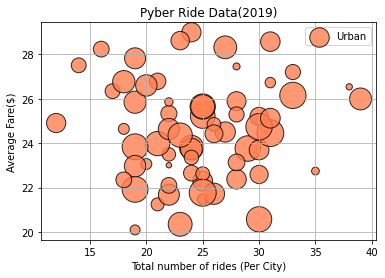

In [38]:
 plt.scatter(urban_ride_count,urban_average_fare,s=10*urban_driver_average,facecolor = 'coral',
             edgecolor = 'black',alpha=0.8,linewidths=1,label="Urban")

plt.title('Pyber Ride Data(2019)')
plt.xlabel('Total number of rides (Per City)')
plt.ylabel('Average Fare($)')
plt.grid(True)
plt.legend()

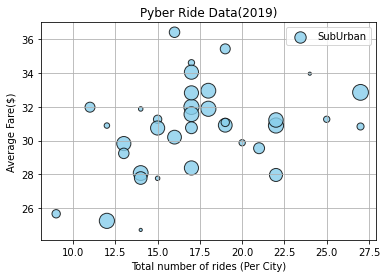

In [39]:
plt.scatter(suburban_ride_count,suburban_average_fare,s=10*suburban_driver_average,facecolor = 'skyblue',
             edgecolor = 'black',alpha=0.8,linewidths=1,label="SubUrban")

plt.title('Pyber Ride Data(2019)')
plt.xlabel('Total number of rides (Per City)')
plt.ylabel('Average Fare($)')
plt.grid(True)
plt.legend()

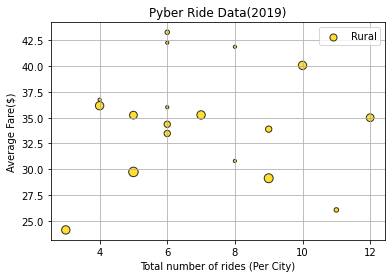

In [40]:
plt.scatter(rural_ride_count,rural_average_fare,s=10*rural_driver_average,facecolor = 'gold',
             edgecolor = 'black',alpha=0.8,linewidths=1,label="Rural")

plt.title('Pyber Ride Data(2019)')
plt.xlabel('Total number of rides (Per City)')
plt.ylabel('Average Fare($)')
plt.grid(True)
plt.legend()

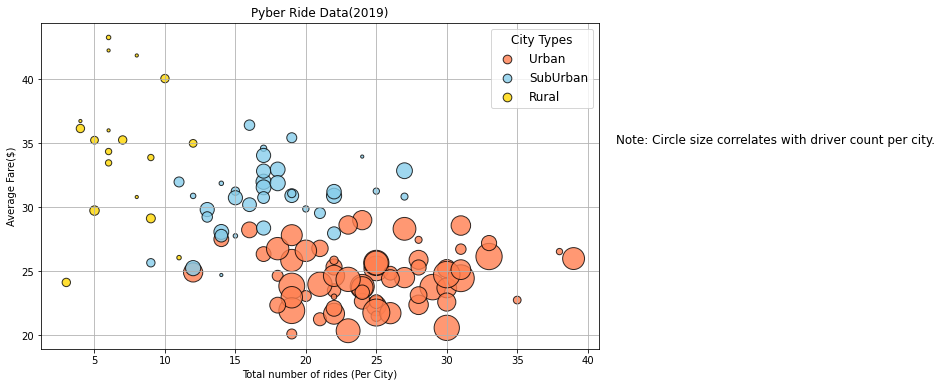

In [45]:
#Build the scatter charts for each city type 

plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,urban_average_fare,s=10*urban_driver_average,facecolor = 'coral',
             edgecolor = 'black',alpha=0.8,linewidths=1,label="Urban")



plt.scatter(suburban_ride_count,suburban_average_fare,s=10*suburban_driver_average,facecolor = 'skyblue',
             edgecolor = 'black',alpha=0.8,linewidths=1,label="SubUrban")



plt.scatter(rural_ride_count,rural_average_fare,s=10*rural_driver_average,facecolor = 'gold',
             edgecolor = 'black',alpha=0.8,linewidths=1,label="Rural")

#Group all the graph properties
plt.title('Pyber Ride Data(2019)')
plt.xlabel('Total number of rides (Per City)')
plt.ylabel('Average Fare($)')
plt.grid(True)
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

plt.savefig('analysis/')
plt.show()
